In [1]:
# Always a bit risky, but I think the chance for name space convolution is small 
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from plotnine import *
import os
# A nice color palette for categorical data 
cbPalette = ["#E69F00", "#56B4E9", "#009E73", 
             "#0072B2", "#D55E00", 
             "#CC79A7", "#F0E442", "#999999"]

col_highlight = ["#D0C0B0", "#0A3D6B", "#B6C2CC", "#BEAAB4", "#ECE9CD", "#0D5C3D", "#812F02"]

# Proportions when saving figures 
BASE_HEIGHT = 5
BASE_WIDTH = 7.0

# Directory for saving figures
dir_save = "./Figs/"
if not os.path.isdir(dir_save):
    os.mkdir(dir_save)

Let us start with looking at some missleading visuals. Let us start with the fact that internet is dead.

C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 7.0 x 5 in image.
C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: Figs/Internet_dead_bad.png
C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 7.0 x 5 in image.
C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: Figs/Internet_dead_good.png


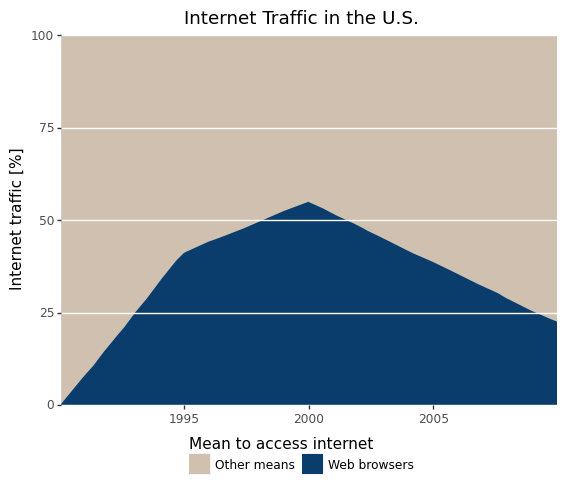

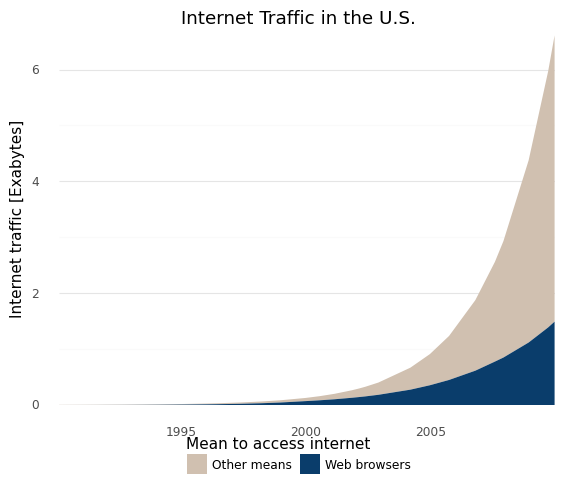

[<ggplot: (146291084240)>, <ggplot: (146291095001)>]

In [2]:
data_internet = pd.read_csv("Data/Internet_dead.csv")
data_internet["Other means"] = 100 - data_internet["Web browsers"]
data_tidy = data_internet.melt(id_vars = ["Year"], value_vars=["Web browsers", "Other means"], var_name="Mean to access internet", value_name="Percent_traffic")

# Further add total amount of traffic
data_tidy["Tot_traffic"] = np.exp(0.3958*(data_tidy["Year"] - 1990)) * np.exp(-6.0196) # Some old fashioned regression
data_tidy["Tot_web"] = data_tidy["Percent_traffic"] / 100 * data_tidy["Tot_traffic"]

p1 = (ggplot(data_tidy, aes("Year", "Percent_traffic", fill="Mean to access internet"))
    + geom_area()
    + scale_fill_manual(values=col_highlight)
    + scale_x_continuous(expand=(0, 0))
    + scale_y_continuous(expand=(0, 0))
    + labs(title = "Internet Traffic in the U.S.", x = "", y = "Internet traffic [%]") 
    + theme(legend_position="bottom", 
            legend_background=element_blank(),
            panel_ontop=True, 
            panel_grid_major_x=element_blank(), 
            panel_grid_minor_x=element_blank(), 
            panel_grid_minor_y=element_blank()))


p2 = (ggplot(data_tidy, aes("Year", "Tot_web", fill="Mean to access internet"))
    + geom_area()
    + scale_fill_manual(values=col_highlight)
    + scale_x_continuous(expand=(0, 0))
    + scale_y_continuous(expand=(0, 0))
    + labs(title = "Internet Traffic in the U.S.", x = "", y = "Internet traffic [Exabytes]") 
    + theme_minimal()
    + theme(legend_position="bottom", 
            legend_background=element_blank(),
            panel_grid_major_x=element_blank(), 
            panel_grid_minor_x=element_blank()))

p1.save("Figs/Internet_dead_bad.png", dpi=300, width=BASE_WIDTH, height=BASE_HEIGHT)
p2.save("Figs/Internet_dead_good.png", dpi=300, width=BASE_WIDTH, height=BASE_HEIGHT)

[p1, p2]

Let us take a look at a very bad example in cable industry infrastructure.

C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 7.0 x 5 in image.
C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: Figs/Deregulation_bad.png
C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 7.0 x 5 in image.
C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: Figs/Deregulation_good.png


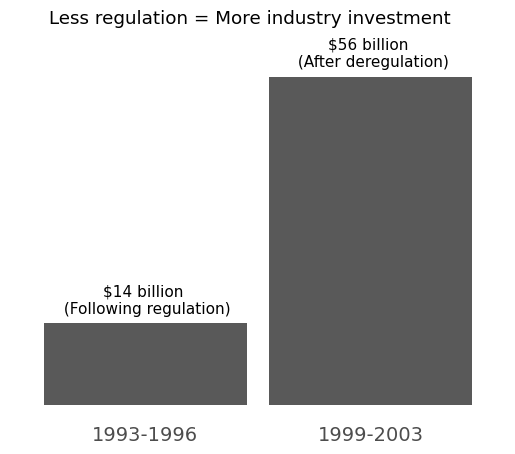

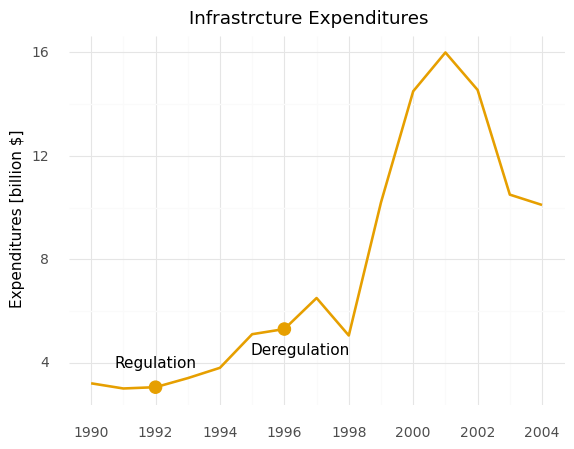

[<ggplot: (146293555911)>, <ggplot: (146293570865)>]

In [3]:
data_full = pd.DataFrame({"Year" : [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004], 
                                   "Expenditures" : [3.2, 3.0, 3.05, 3.4, 3.8, 5.1, 5.3, 6.5, 5.05, 10.2, 14.5, 16, 14.55, 10.5, 10.1]})

data_agg = pd.DataFrame({"Year" : ["1993-1996", "1999-2003"], 
                         "Expenditures" : [14, 56]})

p1 = (ggplot(data_agg, aes("Year", "Expenditures"))
    + geom_bar(stat="identity")
    + scale_y_continuous(expand=(0.0, 0.0, 0, 3))
    + annotate("text", x = "1993-1996", y = 18, label = "$14 billion \n (Following regulation)")
    + annotate("text", x = "1999-2003", y = 60, label = "$56 billion \n (After deregulation)")
    + labs(x = "", y="", title = "Less regulation = More industry investment")
    + theme_minimal()
    + theme(panel_grid=element_blank(),
            axis_text_x=element_text(size=14), 
            axis_ticks=element_blank(),
            axis_text_y=element_blank()))

data_point = data_full.query("Year == 1992 or Year == 1996")

p2 = (ggplot(data_full, aes("Year", "Expenditures"))
    + geom_line(size = 1.05, color=cbPalette[0])
    + geom_point(data=data_point, mapping=aes("Year", "Expenditures"), size=4.5, color=cbPalette[0])
    + scale_x_continuous(breaks=np.linspace(1990, 2004, 8))
    + annotate("text", x = 1992, y = 4, label = "Regulation")
    + annotate("text", x = 1996.5, y = 4.5, label = "Deregulation")
    + theme_minimal()
    + labs(x = "", y = "Expenditures [billion $]", title = "Infrastrcture Expenditures")
    + theme(axis_text_x=element_text(size=10), 
            axis_text_y=element_text(size=10)))

p1.save("Figs/Deregulation_bad.png", dpi=300, width=BASE_WIDTH, height=BASE_HEIGHT)
p2.save("Figs/Deregulation_good.png", dpi=300, width=BASE_WIDTH, height=BASE_HEIGHT)

[p1, p2]

Lastly let us look at a more subtle case. 

C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 7.0 x 5 in image.
C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: Figs/Internet_speed_bad.png


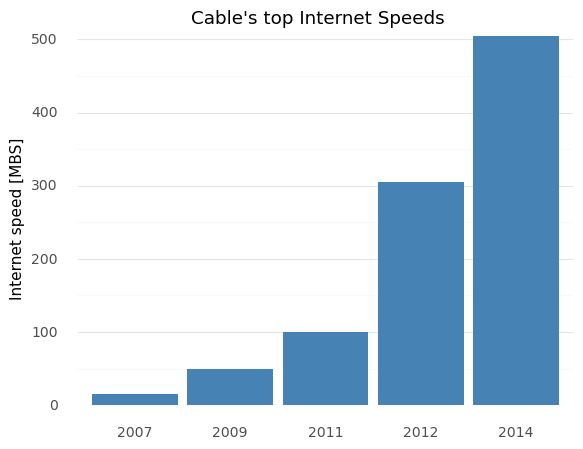

<ggplot: (146293752257)>

In [4]:
data_internet_speed = pd.DataFrame({"Year" : ["2007", "2009", "2011", "2012", "2014"], 
                                    "Speed" : [16, 50, 100, 305, 505]})

p = (ggplot(data_internet_speed, aes("Year", "Speed"))
    + geom_bar(stat = "identity", fill="steelblue")
    + labs(x = "", y = "Internet speed [MBS]", title = "Cable's top Internet Speeds")
    + scale_y_continuous(expand=(0, 0))
    + theme_minimal()
    + theme(panel_grid_major_x=element_blank(),
            axis_text_x=element_text(size=10), 
            axis_text_y=element_text(size=10)))

p.save("Figs/Internet_speed_bad.png", dpi=300, width=BASE_WIDTH, height=BASE_HEIGHT)
p


Often though a graphic is not a good representation of the truth because of honest mistakes. Let us look at Fabricated data (or as an engineer I really hope this is fabricated data) :)

Here we improve the analysis one step. It would also be good to look at salary to other professions, and how the number looks like for other educations.

In [5]:
regret_edu_2022 = pd.DataFrame({"Label" : ["Regret engineer education", "Do not regret engineer education"],
                                "Percent_regret" : [27, 73],
                                "Color" : [col_highlight[1], col_highlight[0]]})

fig, axs = plt.subplots(1, 1, constrained_layout=True)
axs.pie(regret_edu_2022["Percent_regret"], 
        labels=regret_edu_2022["Label"],  
        colors = regret_edu_2022["Color"])
axs.set_title("In 2022 23% of engineer students regret their education")
#plt.show()

fig.savefig("Figs/Students_bad.png")

C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 7.0 x 5 in image.
C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: Figs/Engineer_students_good.png


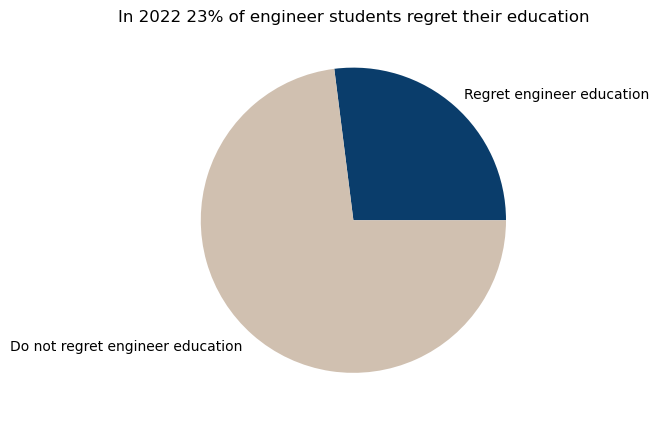

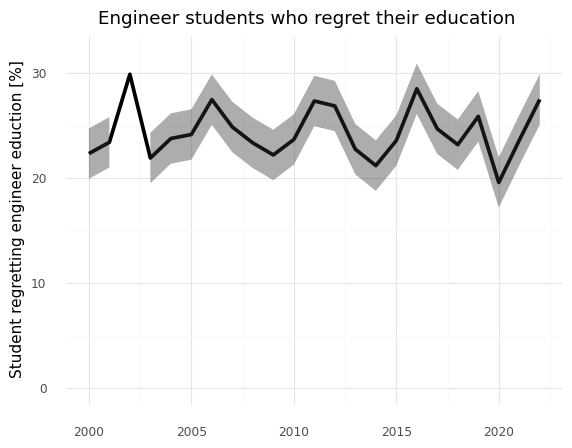

<ggplot: (146291084159)>

In [6]:
# Let us make up a trend-line. 
data_trend = pd.DataFrame({"Year" : np.linspace(2000, 2022, 23), 
                           "Like_edu" : np.random.normal(loc=25.0, scale=2.0, size=23)})
data_trend["Ymax"] = data_trend["Like_edu"] + 2.4
data_trend["Ymin"] = data_trend["Like_edu"] - 2.4

p = (ggplot(data_trend, aes("Year", "Like_edu"))
    + geom_line(size=1.5)
    + geom_ribbon(aes(x = "Year", ymin = "Ymin", ymax = "Ymax"), alpha=0.4)
    + labs(y = "Student regretting engineer eduction [%]", x = "", title = "Engineer students who regret their education")
    + ylim(0, 32)
    + theme_minimal())

p.save("Figs/Engineer_students_good.png", dpi=300, width=BASE_WIDTH, height=BASE_HEIGHT)
p

In [7]:
data_trend

,Year,Like_edu,Ymax,Ymin
0,2000.0,22.367489,24.767489,19.967489
1,2001.0,23.448829,25.848829,21.048829
2,2002.0,29.923660,32.323660,27.523660
3,2003.0,21.949463,24.349463,19.549463
4,2004.0,23.804290,26.204290,21.404290
5,2005.0,24.191178,26.591178,21.791178
6,2006.0,27.511286,29.911286,25.111286
7,2007.0,24.901746,27.301746,22.501746
8,2008.0,23.384486,25.784486,20.984486
9,2009.0,22.241690,24.641690,19.841690


We should also always keep in mind that we know more about our data than anyone else. If an American viewed the visual below they might very well believe in North of Sweden we are socialist, while in the south we are right leaning.

C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 7.0 x 10.0 in image.
C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: Figs/Lan_election_2018.png


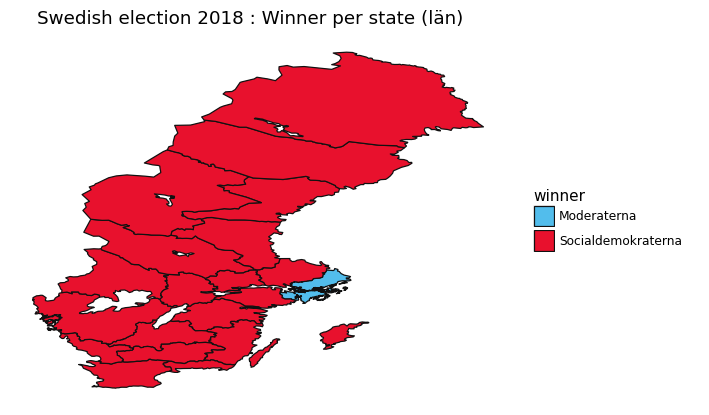

<ggplot: (146163130600)>

In [8]:
swe = gpd.read_file("Data/Lan_Sweref99TM_region.shp")
data_election_lan_sum = pd.read_csv("Data/Election_2018_lan_sum.csv")

data_plot = swe.merge(data_election_lan_sum, left_on="LnNamn", right_on="län")

col_use = ["#52BDEC", "#E8112d", "#DDDD00"]
p = (ggplot(data_plot)
    + geom_map(aes(fill = "winner"))
    + scale_fill_manual(values=col_use, name=None)
    + labs(title = "Swedish election 2018 : Winner per state (län)")
    + theme(panel_background=element_rect(fill = "white"), 
            axis_ticks=element_blank(), 
            axis_text=element_blank()))

p.save("Figs/Lan_election_2018.png", width=BASE_WIDTH, height=BASE_HEIGHT*2.0)

p

Lastly, let us look at text annotations. They are very helpful, but they can also be used to twist the interpretation of the data. Let us look closer at unemployment rate from USA.

C:\Users\me\AppData\Local\Temp\ipykernel_19980\3394486571.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\me\AppData\Local\Temp\ipykernel_19980\3394486571.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\me\AppData\Local\Temp\ipykernel_19980\3394486571.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\me\AppData\Local\Temp\ipykernel_19980\3394486571.py:42: SettingWithCopyWarning: 
A value is trying to b

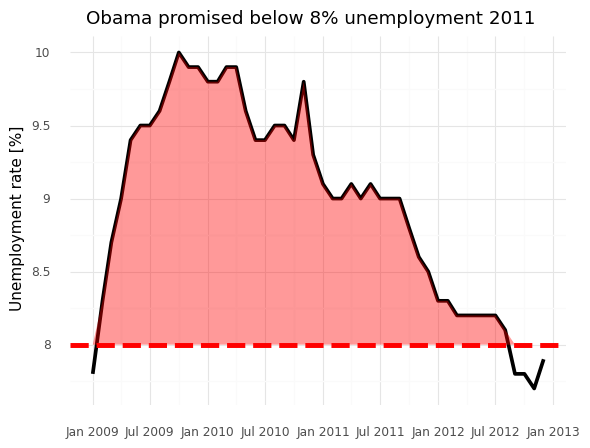

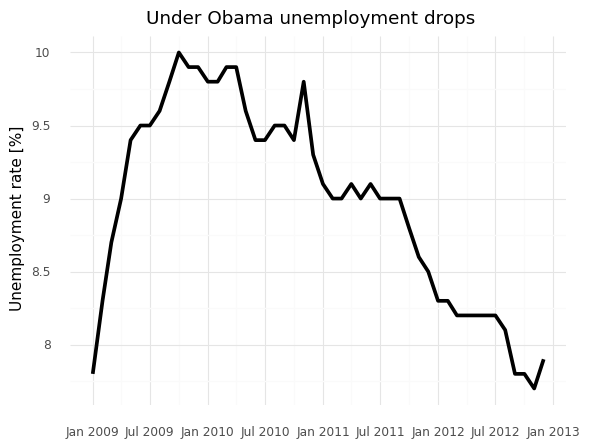

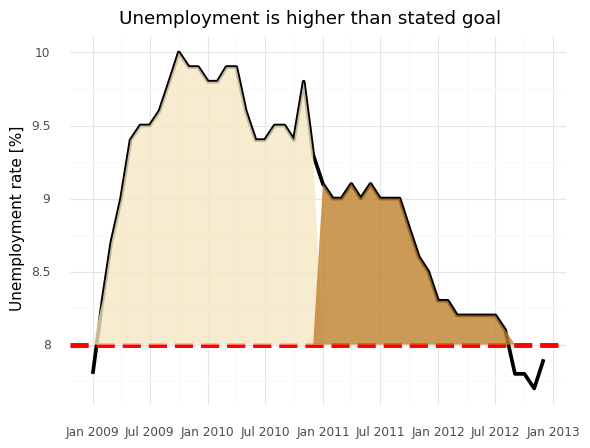

[<ggplot: (146163423552)>, <ggplot: (146163434924)>, <ggplot: (146163427509)>]

In [9]:
# For handling dates 
from mizani.breaks import date_breaks
from mizani.formatters import date_format

dates_2009 = pd.to_datetime(pd.Series(["1/" + str(i) + "/2009" for i in range(1, 13)]), dayfirst=True)
dates_2010 = pd.to_datetime(pd.Series(["1/" + str(i) + "/2010" for i in range(1, 13)]), dayfirst=True)
dates_2011 = pd.to_datetime(pd.Series(["1/" + str(i) + "/2011" for i in range(1, 13)]), dayfirst=True)
dates_2012 = pd.to_datetime(pd.Series(["1/" + str(i) + "/2012" for i in range(1, 13)]), dayfirst=True)

data_2009 = pd.DataFrame({"Year" : dates_2009, 
                          "Unemployment" : [7.8, 8.3, 8.7, 9.0, 9.4, 9.5, 9.5, 9.6, 9.8, 10.0, 9.9, 9.9]})
data_2010 = pd.DataFrame({"Year" : dates_2010, 
                          "Unemployment" : [9.8, 9.8, 9.9, 9.9, 9.6, 9.4, 9.4, 9.5, 9.5, 9.4, 9.8, 9.3]})
data_2011 = pd.DataFrame({"Year" : dates_2011, 
                          "Unemployment" : [9.1, 9.0, 9.0, 9.1, 9.0, 9.1, 9.0, 9.0, 9.0, 8.8, 8.6, 8.5]})
data_2012 = pd.DataFrame({"Year" : dates_2012, 
                          "Unemployment" : [8.3, 8.3, 8.2, 8.2, 8.2, 8.2, 8.2, 8.1, 7.8, 7.8, 7.7, 7.9]})

data_tot = pd.concat([data_2009, data_2010, data_2011, data_2012], ignore_index=True)
data_shade = data_tot.copy()
data_shade["Unemployment"][data_shade["Year"] == "2009-01-01"] = 8.0
data_shade["Unemployment"][data_shade["Year"] > "2012-08-02"] = 8.0

p1 = (ggplot(data_tot, aes("Year", "Unemployment"))
    + geom_line(size=1.5)
    + geom_hline(yintercept=8.0, linetype="dashed", color="red", size=2.0)
    + geom_ribbon(data=data_shade, mapping=aes(ymin=8, ymax="Unemployment"), alpha=0.4, fill="red")
    + labs(x = "", y = "Unemployment rate [%]", title = "Obama promised below 8% unemployment 2011")
    + scale_x_datetime(breaks=date_breaks('6 months'), labels=date_format('%b %Y'))
    + theme_minimal())

# Plotnine does not play well with annotations (so I add them manually elsewhere)
p2 = (ggplot(data_tot, aes("Year", "Unemployment"))
    + geom_line(size=1.5)
    + labs(x = "", y = "Unemployment rate [%]", title = "Under Obama unemployment drops")
    + scale_x_datetime(breaks=date_breaks('6 months'), labels=date_format('%b %Y'))
    + theme_minimal())

data_tot = pd.concat([data_2009, data_2010, data_2011, data_2012], ignore_index=True)
data_shade1, data_shade2 = data_tot.copy(), data_tot.copy()
data_shade1["Unemployment"][data_shade1["Year"] == "2009-01-01"] = 8.0
data_shade1["Unemployment"][data_shade1["Year"] > "2010-12-31"] = 8.0
data_shade2["Unemployment"][data_shade2["Year"] < "2010-12-31"] = 8.0
data_shade2["Unemployment"][data_shade2["Year"] > "2012-08-01"] = 8.0

p3 = (ggplot(data_tot, aes("Year", "Unemployment"))
    + geom_line(size=1.5)
    + geom_hline(yintercept=8.0, linetype="dashed", color="red", size=2.0)
    + geom_ribbon(data=data_shade1, mapping=aes(ymin=8, ymax="Unemployment"), alpha=0.8, fill="#f6e8c3")
    + geom_ribbon(data=data_shade2, mapping=aes(ymin=8, ymax="Unemployment"), alpha=0.8, fill="#bf812d")
    + labs(x = "", y = "Unemployment rate [%]", title = "Unemployment is higher than stated goal")
    + scale_x_datetime(breaks=date_breaks('6 months'), labels=date_format('%b %Y'))
    + theme_minimal())


p1.save("Figs/Unemployed_bad1.svg", width=BASE_WIDTH, height=BASE_HEIGHT*0.75)
p2.save("Figs/Unemployed_bad2.svg", width=BASE_WIDTH, height=BASE_HEIGHT*0.75)
p3.save("Figs/Unemployed_good.svg", width=BASE_WIDTH, height=BASE_HEIGHT*0.75)

[p1, p2, p3]